In [1]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product


import seaborn
from sklearn import preprocessing
from matplotlib.colors import LogNorm
from sklearn.metrics import accuracy_score
from sklearn  import metrics

Populating the interactive namespace from numpy and matplotlib


/Users/aurinko/anaconda/envs/Python2_7_TensorFlow/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn import ensemble , cross_validation, learning_curve, metrics, datasets, tree 
import math
import numpy as np
import pandas as pd
#import xgboost as xgb

/Users/aurinko/anaconda/envs/Python2_7_TensorFlow/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/aurinko/anaconda/envs/Python2_7_TensorFlow/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [4]:
from sklearn import cross_validation, datasets, grid_search, linear_model, metrics

/Users/aurinko/anaconda/envs/Python2_7_TensorFlow/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [5]:
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [6]:
def picture(y_test,predicted_forest):
    right = []
    wrong = []
    y_wrong = []
    for i in range(len(y_test)):
        if y_test[i] == predicted_forest[i] :
            r = y_test[i]
            right.append(r)
        else : 
            wrong.append(predicted_forest[i])
            y_wrong.append(y_test[i])

    plt.scatter(right, right, c = 'r', alpha = 0.1)
    plt.scatter(y_wrong, wrong, c = 'b', alpha = 0.1 )
    plt.xlabel('True Values')
    plt.ylabel('Predictions forest')

## DecisionTreeClassifier

In [7]:
d_tree = tree.DecisionTreeClassifier(max_depth=18, random_state=42)
d_tree.fit(X_train, y_train)
d_tree_pred = d_tree.predict(X_train)
#print 'accuracy_score', accuracy_score(y_train, d_tree_pred)
#print 'predict_proba_X_train', d_tree.predict_proba(X_train)
#print 'predict_proba_X_test', d_tree.predict_proba(X_test)

In [8]:
p = d_tree.predict_proba(X_test)

In [9]:
accuracy_score(y_test, d_tree.predict(X_test))

0.26120465460619979

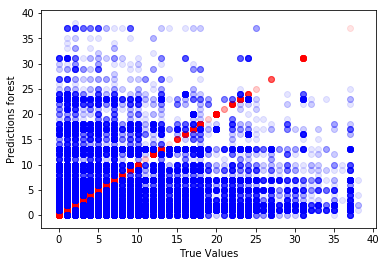

In [10]:
picture(y_test,d_tree.predict(X_test))

# ПОНИЖЕНИЯ РАЗМЕРНОСТИ

# PCA

In [50]:
from sklearn.decomposition import RandomizedPCA

pca = RandomizedPCA(n_components = 2, random_state = 0)
data_2d_pca = pca.fit_transform(X_train)

/Users/aurinko/anaconda/envs/Python2_7_TensorFlow/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


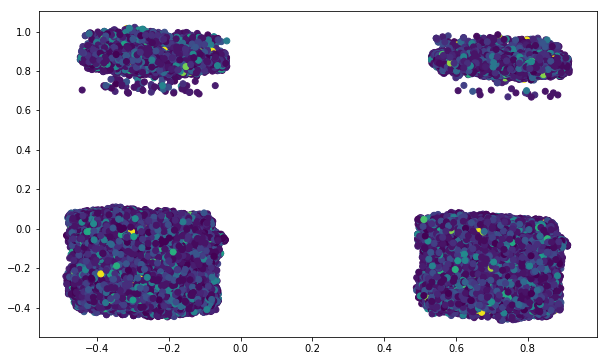

In [51]:
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c = y_train)

In [61]:
classifier = d_tree

In [63]:
from sklearn.metrics import classification_report

In [66]:
classifier.fit(data_2d_pca,  y_train)

pred = classifier.predict(data_2d_pca)

print classification_report(pred, y_train)

             precision    recall  f1-score   support

          0       0.09      0.42      0.15      6472
          1       0.45      0.23      0.30    176053
          2       0.76      0.27      0.40    339494
          3       0.18      0.45      0.26     15272
          4       0.09      0.56      0.16      5136
          5       0.14      0.43      0.21     21425
          6       0.07      0.66      0.12      1652
          7       0.13      0.42      0.20     16776
          8       0.06      0.73      0.11       474
          9       0.08      0.65      0.14      3111
         10       0.06      0.70      0.11      1983
         11       0.02      0.75      0.05        97
         12       0.05      0.79      0.10       481
         13       0.19      0.34      0.24     21079
         14       0.01      0.77      0.03        60
         15       0.01      0.65      0.03       157
         16       0.04      0.78      0.08       279
         17       0.09      0.72      0.17   

In [ ]:
accuracy_score(y_train, pred)

In [68]:
data_2d_pca_test = pca.fit_transform(X_test)
pred_test = classifier.predict(data_2d_pca_test)

In [70]:
print classification_report(pred_test, y_test)

             precision    recall  f1-score   support

          0       0.01      0.06      0.02      2670
          1       0.32      0.17      0.22     71917
          2       0.64      0.23      0.33    147083
          3       0.05      0.11      0.07      7615
          4       0.01      0.06      0.02      2777
          5       0.04      0.11      0.06     10186
          6       0.00      0.03      0.01       877
          7       0.03      0.10      0.05      7334
          8       0.00      0.01      0.00       189
          9       0.01      0.04      0.01      1699
         10       0.00      0.04      0.01      1019
         11       0.00      0.02      0.00        48
         12       0.00      0.01      0.00       300
         13       0.07      0.15      0.09      7254
         14       0.00      0.00      0.00        34
         15       0.00      0.00      0.00        71
         16       0.00      0.02      0.00       134
         17       0.00      0.03      0.01   

In [71]:
accuracy_score(y_test, pred_test)

0.18801040262723287

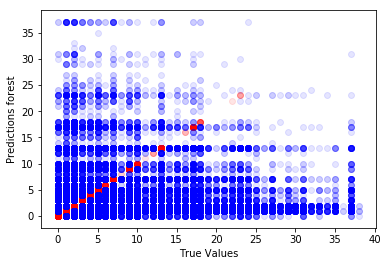

In [72]:
picture(y_test,pred_test)

# MDS

In [11]:
from sklearn import manifold

In [ ]:
mds = manifold.MDS(n_components = 2, n_init = 1, max_iter = 100)
data_2d_mds = mds.fit_transform(X_train)

In [ ]:
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_mds[:, 0], data_2d_mds[:, 1], c = y_train)

In [ ]:
classifier.fit(data_2d_mds, y_test)
pred = classifier.predict(data_2d_mds)
print classification_report(pred, y_test)

In [ ]:
accuracy_score(y_train, pred)

In [68]:
data_2d_pca_test = pca.fit_transform(X_test)
pred_test = classifier.predict(data_2d_pca_test)

In [70]:
print classification_report(pred_test, y_test)

             precision    recall  f1-score   support

          0       0.01      0.06      0.02      2670
          1       0.32      0.17      0.22     71917
          2       0.64      0.23      0.33    147083
          3       0.05      0.11      0.07      7615
          4       0.01      0.06      0.02      2777
          5       0.04      0.11      0.06     10186
          6       0.00      0.03      0.01       877
          7       0.03      0.10      0.05      7334
          8       0.00      0.01      0.00       189
          9       0.01      0.04      0.01      1699
         10       0.00      0.04      0.01      1019
         11       0.00      0.02      0.00        48
         12       0.00      0.01      0.00       300
         13       0.07      0.15      0.09      7254
         14       0.00      0.00      0.00        34
         15       0.00      0.00      0.00        71
         16       0.00      0.02      0.00       134
         17       0.00      0.03      0.01   

In [71]:
accuracy_score(y_test, pred_test)

0.18801040262723287

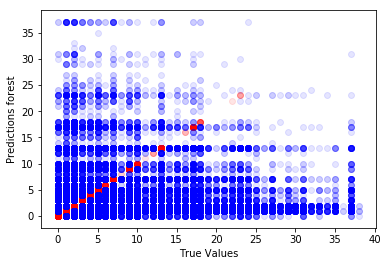

In [72]:
picture(y_test,pred_test)

### t- SNE

In [12]:
from sklearn import manifold

In [ ]:
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
data_2d_tsne = tsne.fit_transform(X_train)

In [ ]:
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c = y_train)

In [ ]:
classifier.fit(data_2d_tsne, y_train)

In [ ]:
pred_tsne = classifier.predict(data_2d_data_2d_tsne)
print classification_report(pred_tsne, y_test)

In [ ]:
accuracy_score(y_train, pred_tsne)

In [68]:
data_2d_tsne_test = tsne.fit_transform(X_test)
pred_tsne_test = classifier.predict(data_2d_tsne_test)

In [70]:
print classification_report(pred_tsne_test, y_test)

             precision    recall  f1-score   support

          0       0.01      0.06      0.02      2670
          1       0.32      0.17      0.22     71917
          2       0.64      0.23      0.33    147083
          3       0.05      0.11      0.07      7615
          4       0.01      0.06      0.02      2777
          5       0.04      0.11      0.06     10186
          6       0.00      0.03      0.01       877
          7       0.03      0.10      0.05      7334
          8       0.00      0.01      0.00       189
          9       0.01      0.04      0.01      1699
         10       0.00      0.04      0.01      1019
         11       0.00      0.02      0.00        48
         12       0.00      0.01      0.00       300
         13       0.07      0.15      0.09      7254
         14       0.00      0.00      0.00        34
         15       0.00      0.00      0.00        71
         16       0.00      0.02      0.00       134
         17       0.00      0.03      0.01   

In [71]:
accuracy_score(y_test, pred_tsne_test)

0.18801040262723287

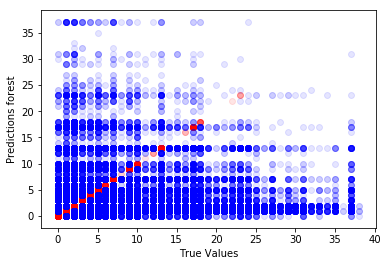

In [72]:
picture(y_test,pred_tsne_test)

### Модель

#### Лес

In [47]:
#Train The Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

class_weight=[]

# Create a random forest Classifier. By convention, clf means 'Classifier'
model_forest = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=18)#, bootstrap=True)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
model_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=18, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [48]:
# make predictions

predicted_forest = model_forest.predict(X_test)
    
print 'accuracy_score', accuracy_score(y_test, predicted_forest)


accuracy_score 0.276497275954


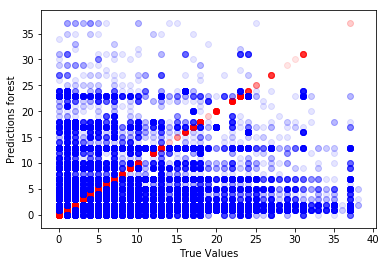

In [49]:
picture(y_test,predicted_forest)

In [11]:
d_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=18,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [41]:
classifier = tree.DecisionTreeClassifier(random_state=42)

parameters_grid = {'criterion': ['gini','entropy'], 
           'max_depth': [12,50],
                  'min_samples_leaf' : [76, None]}


#cv = cross_validation.StratifiedShuffleSplit(train_labels, n_iter = 10, test_size = 0.2, random_state = 42)
grid_cv = grid_search.GridSearchCV(classifier, parameters_grid, scoring = 'accuracy', cv = 3)
#grid_cv = grid_search.GridSearchCV(classifier, parameters_grid, scoring = 'accuracy')


grid_cv.fit(X_train, y_train)



GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [17, 18, 19], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 12, 13, 50], 'min_samples_leaf': [15, 76]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [42]:
grid_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=50,
            max_features=18, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=76, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [43]:
print grid_cv.best_estimator_
print grid_cv.best_score_
print grid_cv.best_params_
print (grid_cv.grid_scores_)

0.267713114661
{'max_features': 18, 'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 76}


In [45]:
(grid_cv.grid_scores_)

[mean: 0.25629, std: 0.00062, params: {'max_features': 17, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 15},
 mean: 0.25657, std: 0.00147, params: {'max_features': 17, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 76},
 mean: 0.25645, std: 0.00097, params: {'max_features': 18, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 15},
 mean: 0.25674, std: 0.00007, params: {'max_features': 18, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 76},
 mean: 0.25662, std: 0.00094, params: {'max_features': 19, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 15},
 mean: 0.25667, std: 0.00099, params: {'max_features': 19, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 76},
 mean: 0.26294, std: 0.00111, params: {'max_features': 17, 'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 15},
 mean: 0.26331, std: 0.00091, params: {'max_features': 17, 'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 76},
 mean: 0.26372, std: 0.0

parameters_grid = {'criterion': ['gini','entropy'], 
           'max_depth': [10,12,13,50],
          'max_features': [17,18,19],
                  'min_samples_leaf' : [15,76]}
              
best {'max_features': 18, 'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 76}
grid_cv.best_score_ 0.267713114661

[mean: 0.25629, std: 0.00062, params: {'max_features': 17, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 15},
 mean: 0.25657, std: 0.00147, params: {'max_features': 17, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 76},
 mean: 0.25645, std: 0.00097, params: {'max_features': 18, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 15},
 mean: 0.25674, std: 0.00007, params: {'max_features': 18, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 76},
 mean: 0.25662, std: 0.00094, params: {'max_features': 19, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 15},
 mean: 0.25667, std: 0.00099, params: {'max_features': 19, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 76},
 mean: 0.26294, std: 0.00111, params: {'max_features': 17, 'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 15},
 mean: 0.26331, std: 0.00091, params: {'max_features': 17, 'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 76},
 mean: 0.26372, std: 0.00113, params: {'max_features': 18, 'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 15},
 mean: 0.26346, std: 0.00085, params: {'max_features': 18, 'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 76},
 mean: 0.26337, std: 0.00097, params: {'max_features': 19, 'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 15},
 mean: 0.26397, std: 0.00105, params: {'max_features': 19, 'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 76},
 mean: 0.26423, std: 0.00110, params: {'max_features': 17, 'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 15},
 mean: 0.26601, std: 0.00032, params: {'max_features': 17, 'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 76},
 mean: 0.26490, std: 0.00193, params: {'max_features': 18, 'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 15},
 mean: 0.26535, std: 0.00124, params: {'max_features': 18, 'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 76},
 mean: 0.26507, std: 0.00151, params: {'max_features': 19, 'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 15},
 mean: 0.26625, std: 0.00175, params: {'max_features': 19, 'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 76},
 mean: 0.24278, std: 0.00063, params: {'max_features': 17, 'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 15},
 mean: 0.26592, std: 0.00023, params: {'max_features': 17, 'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 76},
 mean: 0.24393, std: 0.00189, params: {'max_features': 18, 'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 15},
 mean: 0.26542, std: 0.00135, params: {'max_features': 18, 'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 76},
 mean: 0.24425, std: 0.00176, params: {'max_features': 19, 'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 15},
 mean: 0.26649, std: 0.00106, params: {'max_features': 19, 'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 76},
 mean: 0.25595, std: 0.00004, params: {'max_features': 17, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 15},
 mean: 0.25499, std: 0.00052, params: {'max_features': 17, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 76},
 mean: 0.25612, std: 0.00157, params: {'max_features': 18, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 15},
 mean: 0.25655, std: 0.00148, params: {'max_features': 18, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 76},
 mean: 0.25653, std: 0.00161, params: {'max_features': 19, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 15},
 mean: 0.25658, std: 0.00152, params: {'max_features': 19, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 76},
 mean: 0.26280, std: 0.00143, params: {'max_features': 17, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 15},
 mean: 0.26315, std: 0.00096, params: {'max_features': 17, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 76},
 mean: 0.26367, std: 0.00100, params: {'max_features': 18, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 15},
 mean: 0.26398, std: 0.00090, params: {'max_features': 18, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 76},
 mean: 0.26403, std: 0.00088, params: {'max_features': 19, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 15},
 mean: 0.26440, std: 0.00079, params: {'max_features': 19, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 76},
 mean: 0.26563, std: 0.00076, params: {'max_features': 17, 'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 15},
 mean: 0.26658, std: 0.00023, params: {'max_features': 17, 'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 76},
 mean: 0.26465, std: 0.00060, params: {'max_features': 18, 'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 15},
 mean: 0.26679, std: 0.00023, params: {'max_features': 18, 'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 76},
 mean: 0.26482, std: 0.00053, params: {'max_features': 19, 'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 15},
 mean: 0.26616, std: 0.00057, params: {'max_features': 19, 'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 76},
 mean: 0.24570, std: 0.00115, params: {'max_features': 17, 'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 15},
 mean: 0.26730, std: 0.00011, params: {'max_features': 17, 'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 76},
 mean: 0.24606, std: 0.00083, params: {'max_features': 18, 'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 15},
 mean: 0.26771, std: 0.00010, params: {'max_features': 18, 'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 76},
 mean: 0.24575, std: 0.00077, params: {'max_features': 19, 'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 15},
 mean: 0.26736, std: 0.00039, params: {'max_features': 19, 'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 76}]
______________________________________________________________________________________________________________________

parameters_grid = {'criterion': ['gini','entropy'], 
           'max_depth': [12,13,14,18],
          'max_features': [17,18,19]}

best {'max_features': 19, 'criterion': 'gini', 'max_depth': 13}
grid_cv.best_score_ 0.264510964274

[mean: 0.26323, std: 0.00055, params: {'max_features': 17, 'criterion': 'gini', 'max_depth': 12},
 mean: 0.26249, std: 0.00096, params: {'max_features': 18, 'criterion': 'gini', 'max_depth': 12},
 mean: 0.26311, std: 0.00102, params: {'max_features': 19, 'criterion': 'gini', 'max_depth': 12},
 mean: 0.26441, std: 0.00080, params: {'max_features': 17, 'criterion': 'gini', 'max_depth': 13},
 mean: 0.26387, std: 0.00166, params: {'max_features': 18, 'criterion': 'gini', 'max_depth': 13},
 mean: 0.26451, std: 0.00170, params: {'max_features': 19, 'criterion': 'gini', 'max_depth': 13},
 mean: 0.26331, std: 0.00221, params: {'max_features': 17, 'criterion': 'gini', 'max_depth': 14},
 mean: 0.26348, std: 0.00163, params: {'max_features': 18, 'criterion': 'gini', 'max_depth': 14},
 mean: 0.26379, std: 0.00160, params: {'max_features': 19, 'criterion': 'gini', 'max_depth': 14},
 mean: 0.24941, std: 0.00059, params: {'max_features': 17, 'criterion': 'gini', 'max_depth': 18},
 mean: 0.24939, std: 0.00133, params: {'max_features': 18, 'criterion': 'gini', 'max_depth': 18},
 mean: 0.24899, std: 0.00175, params: {'max_features': 19, 'criterion': 'gini', 'max_depth': 18},
 mean: 0.26302, std: 0.00109, params: {'max_features': 17, 'criterion': 'entropy', 'max_depth': 12},
 mean: 0.26284, std: 0.00140, params: {'max_features': 18, 'criterion': 'entropy', 'max_depth': 12},
 mean: 0.26340, std: 0.00081, params: {'max_features': 19, 'criterion': 'entropy', 'max_depth': 12},
 mean: 0.26442, std: 0.00052, params: {'max_features': 17, 'criterion': 'entropy', 'max_depth': 13},
 mean: 0.26388, std: 0.00029, params: {'max_features': 18, 'criterion': 'entropy', 'max_depth': 13},
 mean: 0.26345, std: 0.00046, params: {'max_features': 19, 'criterion': 'entropy', 'max_depth': 13},
 mean: 0.26225, std: 0.00051, params: {'max_features': 17, 'criterion': 'entropy', 'max_depth': 14},
 mean: 0.26215, std: 0.00078, params: {'max_features': 18, 'criterion': 'entropy', 'max_depth': 14},
 mean: 0.26257, std: 0.00031, params: {'max_features': 19, 'criterion': 'entropy', 'max_depth': 14},
 mean: 0.23869, std: 0.00050, params: {'max_features': 17, 'criterion': 'entropy', 'max_depth': 18},
 mean: 0.23981, std: 0.00080, params: {'max_features': 18, 'criterion': 'entropy', 'max_depth': 18},
 mean: 0.23900, std: 0.00079, params: {'max_features': 19, 'criterion': 'entropy', 'max_depth': 18}]

In [22]:
X_test[0]

array([ 0.25      ,  0.6456044 ,  0.60869565,  0.55472689,  0.22325426,
        0.        ,  0.5       ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [20]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [21]:
from sklearn.metrics import log_loss

In [17]:
# DTC + DTC

In [22]:
# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

seed = 42
kfold = model_selection.KFold(n_splits=20, random_state=seed)

# create the sub models
estimatorsDD = []

model1 = DecisionTreeClassifier(max_depth=13, random_state=42)
estimatorsDD.append(('cart1', model1))

model2 = DecisionTreeClassifier(max_depth=50, random_state=42, criterion='entropy',min_samples_leaf= 76)
estimatorsDD.append(('cart2', model2))

model3 = DecisionTreeClassifier(max_depth=12, random_state=42, min_samples_leaf = 76)
estimatorsDD.append(('cart3', model3))

model4 = DecisionTreeClassifier(max_depth=1000, random_state=42, min_samples_leaf = 1000)
estimatorsDD.append(('cart4', model4))



In [23]:
# create the ensemble model
ensembleDD = VotingClassifier(estimatorsDD, voting='soft')

In [ ]:
resultsDD = model_selection.cross_val_score(ensembleDD, X_train, y_train, cv=kfold)


In [ ]:
ensembleDD.fit(X_train, y_train)

In [ ]:
pred_ensembleDD = ensembleDD.predict(X_test)
picture(y_test,pred_ensembleDD)

In [ ]:
print 'accuracy_score', accuracy_score(y_test, pred_ensembleDD)

In [ ]:
# predict class probabilities for all classifiers
probas = [c.fit(X_train, y_train).predict_proba(X_test) for c in (model1, model2,model3, ensembleDD )]

In [ ]:
for p in probas:
    print log_loss (y_test, p)

In [26]:
#pred_ensembleDD = ensembleDD.predict(XTEST)

In [27]:
pred_ensembleDD

array([1, 1, 2, ..., 1, 1, 2])

In [ ]:
Результаты:
С температурой
n_splits = 20
DecisionTreeClassifier(max_depth=13, random_state=42)
DecisionTreeClassifier(max_depth=50, random_state=42, criterion='entropy',min_samples_leaf= 76)
DecisionTreeClassifier(max_depth=12, random_state=42, min_samples_leaf = 76)
DecisionTreeClassifier(max_depth=1000, random_state=42, min_samples_leaf = 1000)
LogisticRegression(random_state=42)


accuracy_score(y_test, pred_ensembleDD) accuracy_score 
    
log_loss (y_test, p) 

_______________________________________________________________________________________________________________________
n_splits = 20
DecisionTreeClassifier(max_depth=13, random_state=42)
DecisionTreeClassifier(max_depth=50, random_state=42, criterion='entropy',min_samples_leaf= 76)
DecisionTreeClassifier(max_depth=12, random_state=42, min_samples_leaf = 76)
DecisionTreeClassifier(max_depth=1000, random_state=42, min_samples_leaf = 1000)



accuracy_score(y_test, pred_ensembleDD) accuracy_score 0.279807893088
    
log_loss (y_test, p)
3.39854473965
4.17769922818
2.79320579862
2.45511819572    
_______________________________________________________________________________________________________________________    
_______________________________________________________________________________________________________________________    
Без температуры

n_splits = 20
DecisionTreeClassifier(max_depth=13, random_state=42,max_features = 18)
DecisionTreeClassifier(max_depth=50, random_state=42, criterion='entropy',max_features = 18,min_samples_leaf= 76)
DecisionTreeClassifier(max_depth=12, random_state=42, min_samples_leaf = 76)
DecisionTreeClassifier(max_depth=1000, random_state=42, min_samples_leaf = 1000)



accuracy_score(y_test, pred_ensembleDD) accuracy_score 0.280153381803
    
log_loss (y_test, p)
3.41012837464
4.15715178861
2.79353100157
2.45328476393
_______________________________________________________________________________________________________________________    
    
    n_splits = 50
DecisionTreeClassifier(max_depth=13, random_state=42,max_features = 18)
DecisionTreeClassifier(max_depth=50, random_state=42, criterion='entropy',max_features = 18,min_samples_leaf= 76)
DecisionTreeClassifier(max_depth=12, random_state=42, min_samples_leaf = 76)
   
accuracy_score(y_test, pred_ensembleDD) accuracy_score 0.281136695837
    
log_loss (y_test, p)
3.41012837464
4.15715178861
2.79353100157
2.597962064
_______________________________________________________________________________________________________________________    
n_splits = 20    
DecisionTreeClassifier(max_depth=13, random_state=42,max_features = 18)
DecisionTreeClassifier(max_depth=50, random_state=42, criterion='entropy',max_features = 18,min_samples_leaf= 76)
DecisionTreeClassifier(max_depth=12, random_state=42, min_samples_leaf = 76)
   
accuracy_score(y_test, pred_ensembleDD) accuracy_score 0.281136695837   
    
log_loss (y_test, p)
3.41012837464
4.15715178861
2.79353100157
2.597962064
_______________________________________________________________________________________________________________________    
DecisionTreeClassifier(max_depth=13, random_state=42,max_features = 18)
DecisionTreeClassifier(max_depth=13, random_state=42, criterion='entropy',max_features = 17)
DecisionTreeClassifier(max_depth=12, random_state=42, min_samples_leaf = 76)

accuracy_score(y_test, pred_ensembleDD) accuracy_score 0.278543632187

log_loss (y_test, p)
3.41012837464
3.85557276628
2.79353100157
2.57903769926
_______________________________________________________________________________________________________________________

DecisionTreeClassifier(max_depth=13, random_state=42,max_features = 18, min_samples_leaf = 76)
DecisionTreeClassifier(max_depth=13, random_state=42, criterion='entropy',max_features = 17)
DecisionTreeClassifier( random_state=42, min_samples_leaf = 76)

accuracy_score(y_test, pred_ensembleDD) 0.282719869398

log_loss (y_test, p)
2.93601772539
3.85557276628
3.84876398179
2.63351234682
_______________________________________________________________________________________________________________________        
DecisionTreeClassifier(max_depth=12, random_state=42, min_samples_leaf = 76)
DecisionTreeClassifier(max_depth=13, random_state=42, criterion='entropy')
DecisionTreeClassifier(max_depth=12, random_state=42, max_features = 17)

accuracy_score(y_test, pred_ensembleDD) 0.278984035384

log_loss (y_test, p)
2.79353100157
3.84438945918
3.03631220893
2.54370054327

_______________________________________________________________________________________________________________________        
DecisionTreeClassifier(max_depth=12, random_state=42)
DecisionTreeClassifier(max_depth=13, random_state=42, criterion='entropy')
DecisionTreeClassifier(max_depth=12, random_state=42, min_samples_leaf = 76)

accuracy_score(y_test, pred_ensembleDD) 0.277211032859

log_loss (y_test, p)
3.01618094386
3.84438945918
2.79353100157
2.57564137855    
    
_______________________________________________________________________________________________________________________        
DecisionTreeClassifier(max_depth=13, random_state=42, criterion='gini')
DecisionTreeClassifier(max_depth=13, random_state=42, criterion='entropy')
DecisionTreeClassifier(max_depth=12, random_state=42)

accuracy_score(y_test, pred_ensembleDD) 0.278152584521

log_loss (y_test, p)
3.40799174312
3.84438945918
3.01618094386
2.6831575643    
    
    
_______________________________________________________________________________________________________________________    
DecisionTreeClassifier(max_depth=13, random_state=42, criterion='gini')
DecisionTreeClassifier(max_depth=13, random_state=42, criterion='entropy')

accuracy_score(y_test, pred_ensembleDD) 0.27853224245

log_loss (y_test, p)
3.40799174312
3.84438945918
2.78062451391


________________________________________________________________________________________________________________________
DecisionTreeClassifier(max_depth=13, random_state=42)
model1 = DecisionTreeClassifier(max_depth=14, random_state=42)

accuracy_score(y_test, pred_ensembleDD) 0.27104918468459915

log_loss (y_test, p)
4.00296632053
3.40799174312
3.39901981765

# LogisticRegression


In [25]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [26]:
modelLR = LogisticRegression(random_state=42)


In [ ]:
modelLR.fit(X_test, y_test)

In [ ]:
# make predictions

predictedLR = modelLR.predict(X_train)
    
print 'accuracy_score', accuracy_score(y_train, predictedLR)



In [ ]:
rasschet(model)

In [ ]:
picture(y_test,predictedLR)

In [ ]:
0.206488353993 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=100,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.198181438524  logisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=100,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
#СЕТКА
classifier = LogisticRegression(random_state=42,n_jobs=-1)

parameters_grid = {'C': [0.1,1.0], 'penalty': ['l2','l1'] }


#cv = cross_validation.StratifiedShuffleSplit(train_labels, n_iter = 10, test_size = 0.2, random_state = 42)
grid_cv = grid_search.GridSearchCV(classifier, parameters_grid, scoring = 'accuracy', cv = 3)
#grid_cv = grid_search.GridSearchCV(classifier, parameters_grid, scoring = 'accuracy')


grid_cv.fit(X_test, y_test)

/Users/aurinko/anaconda/envs/Python2_7_TensorFlow/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [ ]:
print grid_cv.best_estimator_
print grid_cv.best_score_
print grid_cv.best_params_
print (grid_cv.grid_scores_)

# Voting Ensemble for Classification

In [17]:
# DTC + LR

In [29]:
# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

seed = 42
kfold = model_selection.KFold(n_splits=3, random_state=seed)

# create the sub models
estimators = []

model1 = DecisionTreeClassifier()
estimators.append(('cart', model1))

model2 = LogisticRegression()
estimators.append(('logistic', model2))

In [30]:
# create the ensemble model
ensemble = VotingClassifier(estimators)

In [ ]:
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

In [20]:
ensemble.fit(X_train, y_train)


VotingClassifier(estimators=[('cart', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_le...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

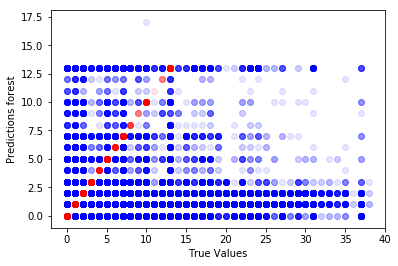

In [21]:
pred_ensemble = ensemble.predict(X_test)
picture(y_test,pred_ensemble)

In [22]:
accuracy_score(y_test, pred_ensemble)

0.22833766776134704

0.23150781146187285 accuracy_score(y_test, pred_ensembleDD) для 2 деревьев без параметров
0.26194878414548489 accuracy_score(y_test, pred_ensembleDD) для 2 деревьев max_depth=18, random_state=42
0.25625011864310254 для 2 деревьев одно с выбранными параметрами
0.22583192543518291 для трех деревьев (третье дерево со всеми выбранными параметрами) и логистической регрессии
0.22583192543518291 для трех деревьев (первое дерево со всеми выбранными параметрами)
0.26194878414548489 для трех max_depth=18, random_state=42
0.22583192543518291    для четырех max_depth=1000, 500, 100, 18





In [50]:
import numpy as np
from sklearn.metrics import confusion_matrix
 
# label - ground truth labels
# predictions - prediction labels
 
def entropy(x, epsilon=1e-6):
    # assumes x is normalized
    return (- x * np.log(x + epsilon)).sum()
 
def conditional_entropy(mat):
    mat = mat / mat.sum()
    return entropy(mat) - entropy(mat.sum(axis=0))
 
print(conditional_entropy(confusion_matrix(y_test, pred_ensembleDD)))

0.0


In [53]:
def get_prediction_df(model_list, x_val, type='auc'):
    
    predictions = []
    for model in model_list:  
        
        if type == 'auc':
            pred_auc = model.predict_proba(x_val.as_matrix())[:,1]
            pred_auc = pd.Series(pred_auc)
            predictions.append(pred_auc)
        else:
            pred = model.predict(x_val.as_matrix())
            pred = pd.Series(pred)
            predictions.append(pred)
    
    predictions = pd.concat(predictions, axis=1)
    
    return predictions

In [51]:
pred_ensembleDD

array([2, 5, 2, ..., 2, 2, 2])

In [52]:
y_test

array([7, 1, 6, ..., 1, 7, 2])

In [46]:
d_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=28,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [55]:
math.sqrt(len(y_train) + len(y_test))

937.0069370074056

In [59]:
d_tree.n_features_

19

In [71]:
range(2,20,1)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [45]:
len(X_train[0])

19

In [47]:
#min_samples_leaf = range(1,100,5)
max_features = range(1,19,1)
max_depth = 12
min_samples_leaf= 76
m = []
n = []
tr = []
    
for i in range(len(max_features)):
    d_tree = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=42,max_features = max_features[i],
                                         min_samples_leaf=min_samples_leaf)
    d_tree.fit(X_train, y_train)
    d_tree_pred_samo = d_tree.predict(X_train)
    d_tree_pred_test = d_tree.predict(X_test)
    
    m.append(metrics.accuracy_score(y_train, d_tree_pred_samo))
    n.append(metrics.accuracy_score(y_test, d_tree_pred_test))
    tr.append(max_features[i])

In [48]:
print max(n)
print n.index(max(n))
print tr[15]

0.268896524232
17
16


In [49]:
max(m)

0.27687211086469449

In [88]:
# test max_depth=max_depth[i], random_state=42, criterion='gini' accur_score = 0.2691
# train max_depth=max_depth[i], random_state=42, criterion='gini' 0.8124
# test max_depth=max_depth[i], random_state=42, criterion='entropy' accur_score = 0.2708
# train max_depth=max_depth[i], random_state=42, criterion='entropy' 0.8818

max_features
# test max_depth=max_depth[i], random_state=42, criterion='entropy', max_depth=14,  accur_score = 0.2706
# train max_depth=max_depth[i], random_state=42, criterion='entropy', max_depth= 14,  0.31116 

min_samples_leaf# (1,19,2)
# test min_samples_leaf=min_samples_leaf[i], random_state=42, criterion='entropy',  accur_score = 0.27138
# train min_samples_leaf=min_samples_leaf[i], random_state=42, criterion='entropy', 0.31079  

min_samples_leaf# (19,30,2)
# test min_samples_leaf=min_samples_leaf[i], random_state=42, criterion='entropy',  accur_score = 
# train min_samples_leaf=min_samples_leaf[i], random_state=42, criterion='entropy',   

min_samples_leaf# (32,50,2)
# test min_samples_leaf=min_samples_leaf[i], random_state=42, criterion='entropy',  accur_score = 0.272628
# train min_samples_leaf=min_samples_leaf[i], random_state=42, criterion='entropy',   0.2929

min_samples_leaf# (50,1000,50) Падает
# test min_samples_leaf=min_samples_leaf[i], random_state=42, criterion='entropy',  accur_score = 0.27266
# train min_samples_leaf=min_samples_leaf[i], random_state=42, criterion='entropy',   0.2892

min_samples_leaf# (0,100,5) 
# test min_samples_leaf=min_samples_leaf[i], random_state=42, criterion='entropy',  accur_score = 0.272970 при min_samples_leaf= 76
# train min_samples_leaf=min_samples_leaf[i], random_state=42, criterion='entropy',   0.31079



max_depth=max_depth# (0,20,1) max при 16
# test max_depth=max_depth=max_depth=max_depth[i], random_state=42, criterion='entropy',  min_samples_leaf= 76
            #accur_score = 0.27459
# train max_depth=max_depth=max_depth=max_depth[i], random_state=42, criterion='entropy',  
            #accur_score = 0.2979

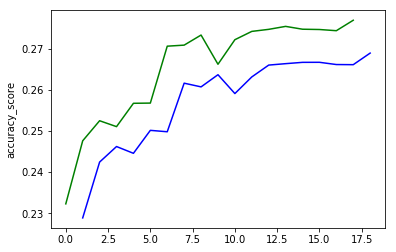

In [50]:
# График    
plt.plot(tr,n,'-', color = 'b')
plt.plot(m,'-',color = 'g')
#plt.plot(k,'-',color = 'r')
plt.xlabel('')
plt.ylabel('accuracy_score')
#plt.title('')
plt.show()

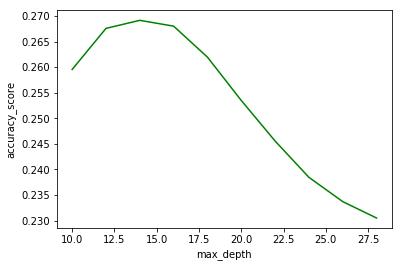

In [43]:
# График    
plt.plot(tr, m,'-', color = 'b')
plt.plot(tr, n,'-',color = 'g')
plt.plot(tr, c,'-',color = 'r')


plt.xlabel('max_depth')
plt.ylabel('accuracy_score')
#plt.title('')
plt.show()

In [44]:
tr

[10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

In [ ]:
criterion='gini'

## результаты
0.223922246056 - bootstrap=True
0.223922246056 - c весом признаков и без
0.223922246056 - bootstrap = True, 10 деревьев, добавила праздники, дни недели и погоду max_depth =18

# результаты

0.19048197573985839 - bootstrap = True, 10 деревьев

0.18                - bootstrap = False, 10 деревьев

0.21197061447635679 - bootstrap = True, 100 деревьев

0.19037946809924258 -  bootstrap = True, 10 деревьев, добавила праздники (все = 0) (и стало хуже)

0.20145788644431367 - bootstrap = True, 20 деревьев, добавила праздники (все = 0)

0.201192125894569   - bootstrap = True, 20 деревьев, добавила праздники (работают верно)(и стало хуже) 

0.1912830539683745   - bootstrap = True, 10 деревьев, добавила праздники (работают верно)(и стало лучше!)

0.19591867727177814 - bootstrap = True, 10 деревьев, добавила праздники и дни недели (и стало лучше!)

0.19643501205413921 - bootstrap = True, 10 деревьев, добавила праздники, дни недели и погоду

0.21446117048539265 -  bootstrap = True, 20 деревьев, добавила праздники, дни недели и погоду

0.23334155925511116 - -  bootstrap = True, 20 деревьев, добавила праздники, дни недели и погоду max_depth =18

0.23695210615235673 -  bootstrap = True, 30 деревьев, добавила праздники, дни недели и погоду max_depth =18

0.23917310503236583 - bootstrap = True, 50 деревьев, добавила праздники, дни недели и погоду max_depth =18

0.223922246056      - bootstrap = True, 10 деревьев, добавила праздники, дни недели и погоду max_depth =18

In [ ]:
predicted_forest

In [ ]:
print(metrics.classification_report(y_test, predicted_forest))
    

In [ ]:
print(metrics.confusion_matrix(y_test, predicted_forest))



In [ ]:
#metrics.log_loss(y_test, predicted_forest)

In [ ]:
# Как предсказал
model_forest.predict_proba(X_test)[3]

In [ ]:
(y_test)[3]

pd.factorize(shdf['Category'])[1]

Index([u'WARRANTS', u'OTHER OFFENSES', u'LARCENY/THEFT', u'VEHICLE THEFT',
       u'VANDALISM', u'NON-CRIMINAL', u'ROBBERY', u'ASSAULT', u'WEAPON LAWS',
       u'BURGLARY', u'SUSPICIOUS OCC', u'DRUNKENNESS',
       u'FORGERY/COUNTERFEITING', u'DRUG/NARCOTIC', u'STOLEN PROPERTY',
       u'SECONDARY CODES', u'TRESPASS', u'MISSING PERSON', u'FRAUD',
       u'KIDNAPPING', u'RUNAWAY', u'DRIVING UNDER THE INFLUENCE',
       u'SEX OFFENSES FORCIBLE', u'PROSTITUTION', u'DISORDERLY CONDUCT',
       u'ARSON', u'FAMILY OFFENSES', u'LIQUOR LAWS', u'BRIBERY',
       u'EMBEZZLEMENT', u'SUICIDE', u'LOITERING', u'SEX OFFENSES NON FORCIBLE',
       u'EXTORTION', u'GAMBLING', u'BAD CHECKS', u'TREA', u'RECOVERED VEHICLE',
       u'PORNOGRAPHY/OBSCENE MAT'],
      dtype='object')

In [ ]:
#pd.crosstab(y_test, predicted_forest, rownames=['Actual Species'], colnames=['Predicted Species'])

In [ ]:
# View a list of the features and their importance scores

# fichi: 'year_s', 'dayOfyear_s', 'hour_s','Xs', 'Ys', 'holiday']]),shdf_cat_cod_T
model_forest.feature_importances_

In [ ]:
accuracy_score(y_test, predicted_forest)

In [ ]:
#metrics.log_loss(y_test, predicted_forest)

# Forest

In [18]:
#Train The Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
modelforest = RandomForestClassifier(random_state=42, n_estimators=10)

In [20]:
rasschet(modelforest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
accuracy_score 0.196435012054


array([ 2,  2,  5, ..., 12,  5,  1])

# Наивный байес

In [ ]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [ ]:
modelNB = GaussianNB()


In [ ]:
predicted_NB = rasschet(modelNB)

In [ ]:
#more_info(predicted_NB)

In [ ]:
predicted_NB

In [ ]:
#metrics.log_loss(y_test, predicted_NB)

In [ ]:
accuracy_score 0.0236147231345 наивный байес GaussianNB(priors=None)

# K-ближайших соседей

In [ ]:
# долго и похоже на forest

In [90]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [43]:
# fit a k-nearest neighbor model to the data
modelKnn = KNeighborsClassifier(n_jobs=100)


In [44]:
predicted_Knn = rasschet(modelKnn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=100, n_neighbors=5, p=2,
           weights='uniform')
accuracy_score 0.146680840563


In [ ]:
accuracy_score 0.146680840563 KNeighborsClassifier(n_jobs=100) algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=100, n_neighbors=5, p=2,
           weights='uniform'  
        добавила праздники, дни недели и погоду

# Метод опорных векторов

In [20]:
from sklearn import metrics
from sklearn.svm import SVC

In [ ]:
# fit a SVM model to the data
modelSCV = SVC(random_state=42)


In [ ]:
rasschet(modelSCV)

## Подготовка к загрузке на кегл

In [50]:
#Сохраню ответ в датафрейм 

Categories = ['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING', 'SEX OFFENSES NON FORCIBLE',
       'EXTORTION', 'GAMBLING', 'BAD CHECKS', 'TREA', 'RECOVERED VEHICLE',
       'PORNOGRAPHY/OBSCENE MAT']

Cat_Nomber = range(0,39)

b = {'Categories': Categories, 'Cat_Nomber' : Cat_Nomber}
answ_cat = pd.DataFrame(data=b)
answ_cat

a = {'digit_answ': pred_ensembleDD}
answ = pd.DataFrame(data=a)

answ = answ.merge(answ_cat, 'left', left_on='digit_answ', right_on = 'Cat_Nomber')

answ1 = pd.get_dummies(answ.Categories)
ss = pd.read_csv('sampleSubmission.csv',',',  dayfirst=True)


,digit_answ,Cat_Nomber,Categories
0,1,1,OTHER OFFENSES
1,1,1,OTHER OFFENSES
2,2,2,LARCENY/THEFT
3,1,1,OTHER OFFENSES
4,1,1,OTHER OFFENSES


In [57]:
answ1['Id'] = ss.Id
answ1['BRIBERY'] = ss.BRIBERY
answ1['EXTORTION'] = ss.EXTORTION
answ1['FAMILY OFFENSES'] = ss['FAMILY OFFENSES']
answ1['GAMBLING'] = ss.GAMBLING
answ1['PORNOGRAPHY/OBSCENE MAT'] = ss['PORNOGRAPHY/OBSCENE MAT']
answ1['SEX OFFENSES NON FORCIBLE'] = ss['SEX OFFENSES NON FORCIBLE']
answ1['SUICIDE'] = ss.SUICIDE
answ1['TREA'] = ss.TREA

In [ ]:
# Сохраню результаты по ТЕСТУ в файл
answ1.to_csv('TEST_SET_prediction.csv', sep=',', index=False)

# загрузка обратно, проверка
f = pd.read_csv('TEST_SET_prediction.csv',',',  dayfirst=True)
#df.columns
f.head()